## Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/Advertising.csv')

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
# Everything but the sales column
X = df.drop('sales', axis = 1)

In [10]:
y = df['sales']

#### Linear Regression

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Absolute Error: 1.2137457736144803
Mean Squared Error: 2.2987166978863782
R-Squared: 0.9185780903322446


# Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)

In [17]:
# Converter 'fits' to data, in this case, reads in every X column, then it 'transforms' and outputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)

In [18]:
poly_features.shape

(200, 9)

In [19]:
X.shape

(200, 3)

In [20]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [21]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [22]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [23]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [24]:
230.1*37.8

8697.779999999999

In [25]:
230.1*69.2

15922.92

In [26]:
37.8*69.2

2615.7599999999998

## Train split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

# Model fitting

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression(fit_intercept=True)

In [30]:
model.fit(X_train, y_train)

LinearRegression()

# Calculate performance on Test Set

In [31]:
test_predictions = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.square(MSE)
r2 = r2_score(y_test, test_predictions)

In [34]:
MAE

0.48967980448037096

In [35]:
MSE

0.44175055104035904

In [36]:
RMSE

0.19514354934446085

In [37]:
r2

0.9843529333146789

## Choosing a Model

In [38]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [39]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742623309994,
 2.5758247707699113,
 4.490840128985557,
 1381.3940440344732,
 4449.685935518502,
 95891.23665756262]

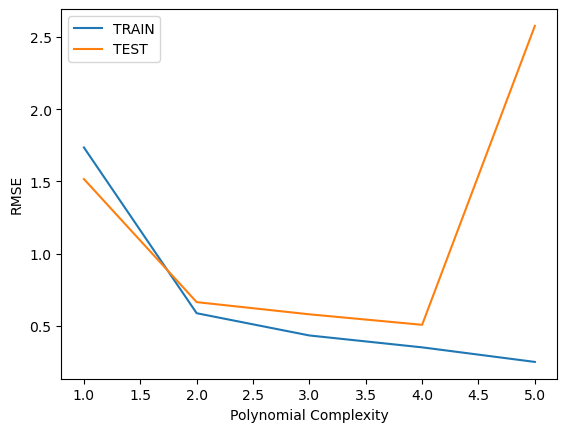

In [40]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

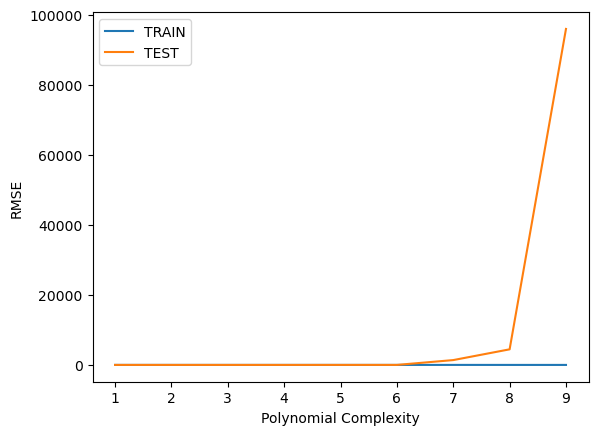

In [41]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

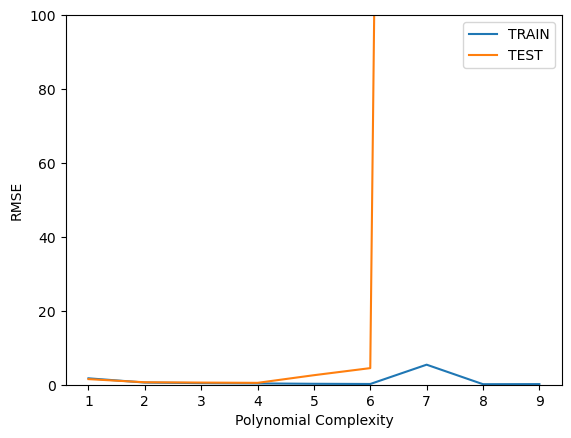

In [42]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()